In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Load an image in grayscale
image = cv2.imread("target_images/20190801-10-9-93-92.jpeg", cv2.IMREAD_GRAYSCALE)

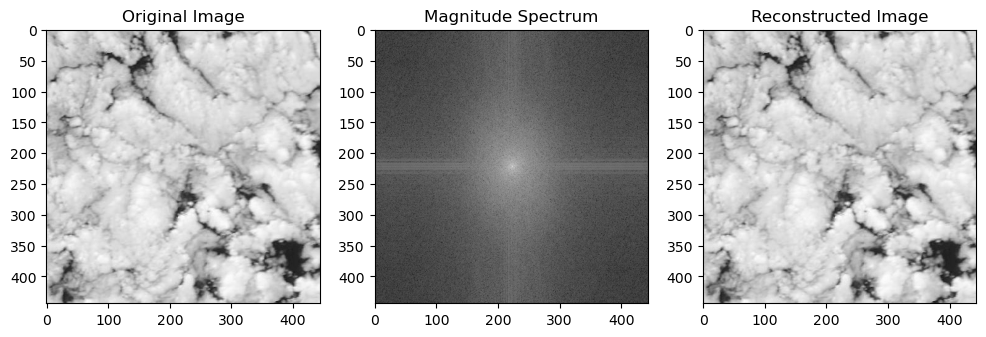

In [3]:
if image is None:
    raise ValueError("Image not found. Check the file path.")

# Compute the 2D Fourier Transform
f_transform = np.fft.fft2(image)
f_shift = np.fft.fftshift(f_transform)  # Shift zero frequency component to the center

# Compute magnitude spectrum
magnitude_spectrum = 20 * np.log(np.abs(f_shift) + 1)  # Adding 1 to avoid log(0)

# Inverse Fourier Transform to reconstruct the image
f_ishift = np.fft.ifftshift(f_shift)
image_reconstructed = np.fft.ifft2(f_ishift)
image_reconstructed = np.abs(image_reconstructed)

# Display results
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
plt.title("Original Image")
plt.imshow(image, cmap="gray")

plt.subplot(1, 3, 2)
plt.title("Magnitude Spectrum")
plt.imshow(magnitude_spectrum, cmap="gray")

plt.subplot(1, 3, 3)
plt.title("Reconstructed Image")
plt.imshow(image_reconstructed, cmap="gray")

plt.show()
